In [5]:
import tensorflow as tf 
import tensorflow_datasets as tfds 
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
print(tf.__version__)
print(f"Compatibilidad con la gpu {len(tf.config.list_physical_devices('GPU')) > 0}")
if tf.config.list_physical_devices('GPU'):
    device_name = tf.test.gpu_device_name()
else: 
    device_name = 'cpu:0'
print(device_name)

2.18.0
Compatibilidad con la gpu False
cpu:0


In [7]:
#? Definir la funcion generadora
def make_generator_network(
    num_hidden_layers = 1,
    num_hidden_units = 100,
    num_output_units = 784
):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(
            tf.keras.layers.Dense(
                units=num_hidden_units,
                use_bias=False)
        )
        model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(
        units=num_output_units, activation='tanh'
    ))
    return model

In [8]:
## Definir la función discriminante:
def make_discriminator_network(
        num_hidden_layers=1,
        num_hidden_units=100,
        num_output_units=1):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))

    model.add(
        tf.keras.layers.Dense(
            units=num_output_units,
            activation=None)
    )
    return model

In [9]:
# Contruccion de una red neuronal generador y discriminadora 
image_size = (28, 28)
z_size = 20
mode_z = 'uniform'  # 'uniform' vs. 'normal'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)

gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers,
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size))

gen_model.build(input_shape=(None, z_size))
gen_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,184 (317.12 KB)

 Trainable params: 81,184 (317.12 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#? Construccion de una red neuronal generadora y discriminadora
disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size) 
disc_model.build(input_shape=(None, np.prod(image_size))) 
disc_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,601 (307.04 KB)

 Trainable params: 78,601 (307.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Conjunto de datos de prueba              
mnist_bldr = tfds.builder('mnist') 
mnist_bldr.download_and_prepare() 
mnist = mnist_bldr.as_dataset(shuffle_files=False) 

def preprocess(ex, mode='uniform'): 
    image = ex['image'] 
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.reshape(image, [-1]) 
    image = image*2 - 1.0 
    if mode == 'uniform': 
        input_z = tf.random.uniform( shape=(z_size,), minval=-1.0, maxval=1.0)
    elif mode == 'normal':
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image

c:\Users\chapu\Documents\Repositorios2\Samsung_InovationCampus\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:16<00:00,  4.03s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:16<00:00,  4.08s/ url]
                                                                        

Dataset mnist downloaded and prepared to C:\Users\chapu\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [12]:
#14                                                     
mnist_trainset = mnist['train']
print('antes de procesar')
example = next(iter(mnist_trainset))['image']
print('dtype: ', example.dtype, ('minimo: {} maximo: {}'. format(np.min(example), np.max(example))))
mnist_trainset = mnist_trainset.map(preprocess)
print('despues de preprocesar')
example = next(iter(mnist_trainset))[0]
print('dtype: ', example.dtype, ('minimo: {} maximo: {}'. format(np.min(example), np.max(example))))

antes de procesar
dtype:  <dtype: 'uint8'> minimo: 0 maximo: 255
despues de preprocesar
dtype:  <dtype: 'float32'> minimo: -0.8737728595733643 maximo: 0.9460210800170898


In [13]:
#15
mnist_trainset = mnist_trainset.batch(32, drop_remainder=True) 
input_z, input_real = next(iter(mnist_trainset)) 
print('input-z -- forma', input_z.shape) 
print('input-real -- forma', input_real.shape)

input-z -- forma (32, 20)
input-real -- forma (32, 784)


In [14]:
#16
g_output = gen_model(input_z)
print('Salida del generador -- forma:', g_output.shape)
d_logits_real = disc_model(input_real)
d_logits_fake = disc_model(g_output)
print('discriminador (real) -- forma:', d_logits_real.shape)
print('discriminador (false) -- forma:', d_logits_fake.shape)

Salida del generador -- forma: (32, 784)
discriminador (real) -- forma: (32, 1)
discriminador (false) -- forma: (32, 1)


In [15]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#Pérdida del
# generador
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print('Pérdida del generador: {:.4f}'.format(g_loss))

Pérdida del generador: 0.6820


In [16]:
#18
## Perdida del generadox
d_labels_real = tf.ones_like(d_logits_real)
d_labels_fake = tf.zeros_like(d_logits_fake)
d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)
d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)
print('perdida del discriminador: real {:.4f} falso {:.4f}'
        .format(d_loss_real.numpy(), d_loss_fake.numpy()))

perdida del discriminador: real 0.3263 falso 0.7099


In [17]:
#19
import time

num_epochs = 100
batch_size = 64
image_size = (28, 28)
z_size = 20
mode_z = 'uniform'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)
np.random.seed(1)

In [18]:
if mode_z == 'uniform':
    fixed_z = tf.random.uniform(
        shape=(batch_size, z_size),
        minval=1, maxval=1)

elif mode_z == 'normal':
    fixed_z = tf.random.normal(
        shape=(batch_size, z_size)
    )

In [19]:
def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, image_size))
    return (images+1)/2.0

In [20]:
#20
mnist_trainset =mnist['train']
mnist_trainset = mnist_trainset.map(
	lambda ex: preprocess(ex, mode=mode_z))

mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(
	batch_size, drop_remainder=True)

In [21]:
#21
with tf.device(device_name):
	gen_model = make_generator_network(
		num_hidden_layers=gen_hidden_layers,
		num_hidden_units=gen_hidden_size,
		num_output_units=np.prod(image_size))
	gen_model.build(input_shape=(None, z_size))

	disc_model = make_discriminator_network(
		num_hidden_layers=disc_hidden_layers,
		num_hidden_units=disc_hidden_size)
	disc_model.build(input_shape=(None, np.prod(image_size)))

#Funcion de perdida y optimizador

loss_fn =tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_optimizer = tf.keras.optimizers.Adam()
d_optimizer = tf.keras.optimizers.Adam()

In [22]:
#22
all_losses = []
all_d_vals = []
epoch_samples = []
start_time = time.time()
for epoch in range(1, num_epochs+1):
  epoch_losses, epoch_d_vals = [], []
  for i, (input_z, input_real) in enumerate(mnist_trainset):
    ## Calcula la perdida del generador
    with tf.GradientTape() as g_tape:
      g_output = gen_model(input_z)
      d_logits_fake = disc_model(g_output, training=True)
      labels_real = tf.ones_like(d_logits_fake)
      g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)
    # Calcular el gradiente de g_loss
    g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
    # Optimizador: Aplicar gradientes
    g_optimizer.apply_gradients(
        grads_and_vars=zip(g_grads, gen_model.trainable_variables))

In [23]:
#23                                                               
#Calcular la pérdida del discriminador
with tf.GradientTape() as d_tape: 
    d_logits_real = disc_model(input_real, training=True) 
    d_labels_real = tf.ones_like(d_logits_real) 
    d_loss_real = loss_fn( y_true=d_labels_real, y_pred=d_logits_real) 
    d_logits_fake = disc_model(g_output, training=True) 
    d_labels_fake = tf.zeros_like(d_logits_fake) 
    d_loss_fake = loss_fn( y_true=d_labels_fake, y_pred=d_logits_fake) 
    d_loss = d_loss_real + d_loss_fake 
    # Calcula el gradiente de d_loss. 
d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)

In [31]:

## Optimizador: Aplicar 'gradientes'
d_optimizer.apply_gradients(
	grads_and_vars=zip(d_grads, disc_model.trainable_variables))
epoch_losses.append((
	float(g_loss.numpy()),
	float(d_loss.numpy()),
	float(d_loss_real.numpy()),
	float(d_loss_fake.numpy())
))

d_probs_real = tf.reduce_mean(tf.sigmoid(d_logits_real))
d_probs_fake = tf.reduce_mean(tf.sigmoid(d_logits_fake))
epoch_d_vals.append((float(d_probs_real.numpy()), float(d_probs_fake.numpy())))
all_losses.append(epoch_losses)
all_d_vals.append(epoch_d_vals)
print(
	'época {:03d} | tiempo {:.2f}min | Pérdida media >>'
	'Generador/Discriminador {:.4f}/{:.4f} [Discriminador-Real: {:.4f} Discriminador-Falso: {:.4f}]'
	.format(
		epoch, (time.time() - start_time)/60,
		*list(np.mean(np.array(all_losses[-1]), axis=0))))
epoch_samples.append(
	create_samples(gen_model, fixed_z))

época 100 | tiempo 40.28min | Pérdida media >>Generador/Discriminador 0.0000/27.6920 [Discriminador-Real: 1.5691 Discriminador-Falso: 26.1229]


ValueError: Can't convert Python sequence with mixed types to Tensor.

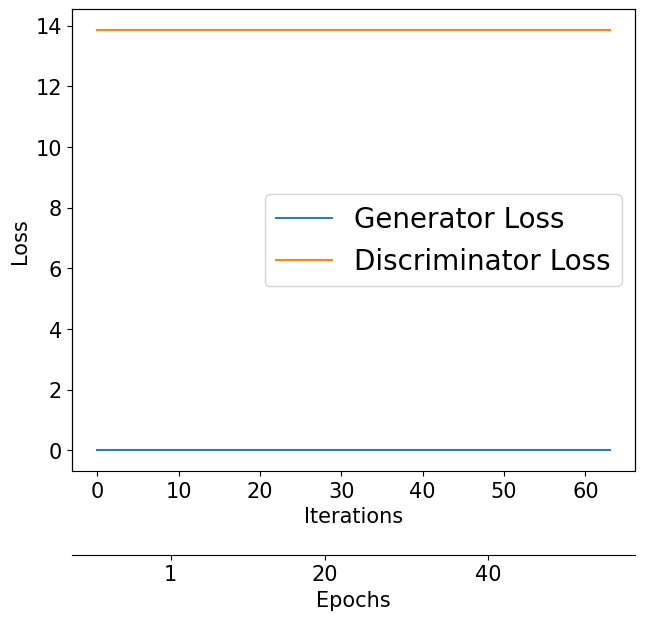

In [32]:
#25
import itertools
fig = plt.figure(figsize=(16,6))
## Gráfico de pérdidas
ax = fig.add_subplot(1,2,1)
g_losses = [item[0] for item in itertools.chain(*all_losses)]
d_losses = [item[1]/2.0 for item in itertools.chain(*all_losses)]
plt.plot(g_losses, label='Generator Loss', alpha=0.95)
plt.plot(d_losses, label='Discriminator Loss', alpha=0.95)
plt.legend(fontsize=20)
ax.set_xlabel('Iterations', size=15)
ax.set_ylabel('Loss', size=15)
epochs = np.arange(1, 101)
epoch2iter = lambda e: e+len(all_losses[-1])
epoch_ticks = [1, 20, 40, 60, 80, 100]
newpos = [epoch2iter(e) for e in epoch_ticks]
ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epochs', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

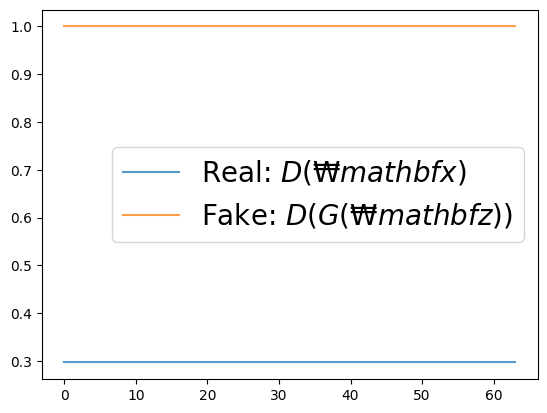

In [33]:
##Imprimir discriminador
ax = fig.add_subplot(1, 2, 2)
d_vals_real = [item[0] for item in itertools.chain(*all_d_vals)]
d_vals_fake = [item[1] for item in itertools.chain(*all_d_vals)]
plt.plot(d_vals_real, alpha=0.75, label=r'Real: $D(₩mathbf{x})$')
plt.plot(d_vals_fake, alpha=0.75, label=r'Fake: $D(G(₩mathbf{z}))$')
plt.legend(fontsize=20)
ax.set_xlabel('Iterations', size=15)
ax.set_ylabel('Discriminator Output', size=15)
ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epoch', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

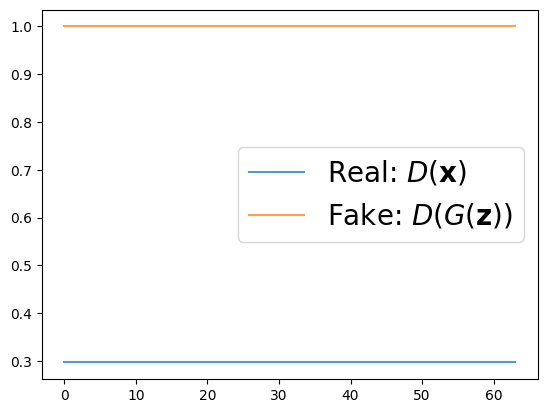

In [34]:
## 26 Imprimir discriminador
ax = fig.add_subplot(1, 2, 2)
d_vals_real = [item[0] for item in itertools.chain(*all_d_vals)]
d_vals_fake = [item[1] for item in itertools.chain(*all_d_vals)]
plt.plot(d_vals_real, alpha=0.75, label=r'Real: $D(\mathbf{x})$')
plt.plot(d_vals_fake, alpha=0.75, label=r'Fake: $D(G(\mathbf{z}))$')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Discriminator output', size=15)
ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epoch', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

IndexError: list index out of range

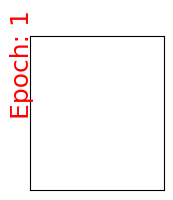

In [35]:
#28
selected_epochs = [1,2,4,10,50,100]
fig = plt.figure(figsize=(10,14))
for i,e in enumerate(selected_epochs):
  for j in range(5):
    ax = fig.add_subplot(6,5,i*5*j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    if j == 0:
      ax.text(
          -0.06, 0.5, 'Epoch: {}'.format(e),
          rotation=90, fontsize=18, color='red',
          horizontalalignment='center',
          transform=ax.transAxes)
      
      image = epoch_samples[e-1][j]
      ax.imshow(image, cmap='gray_r')
plt.show()